In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('../datasets/wicket-1.3.0-beta2.csv')

df.head()

,File,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
0,jdk-1.4/wicket-datetime/src/main/java/org/apac...,0,10,212,8,0,1,0,18,2,...,0.966981,0.666667,0,1,3,1,False,0,False,0
1,jdk-1.4/wicket-datetime/src/main/java/org/apac...,0,4,273,3,0,1,1,18,1,...,0.937729,0.500000,0,2,2,0,False,0,False,0
2,jdk-1.4/wicket-datetime/src/main/java/org/apac...,0,4,231,2,0,1,1,12,1,...,0.917749,0.333333,0,2,3,1,False,0,False,0
3,jdk-1.4/wicket-datetime/src/main/java/org/apac...,0,6,104,2,0,1,1,4,1,...,0.971429,0.500000,0,1,2,1,False,0,False,0
4,jdk-1.4/wicket-datetime/src/main/java/org/apac...,0,5,128,2,0,1,1,5,1,...,0.968992,0.500000,0,1,2,1,False,0,False,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File                       1763 non-null   object 
 1   CountDeclMethodPrivate     1763 non-null   int64  
 2   AvgLineCode                1763 non-null   int64  
 3   CountLine                  1763 non-null   int64  
 4   MaxCyclomatic              1763 non-null   int64  
 5   CountDeclMethodDefault     1763 non-null   int64  
 6   AvgEssential               1763 non-null   int64  
 7   CountDeclClassVariable     1763 non-null   int64  
 8   SumCyclomaticStrict        1763 non-null   int64  
 9   AvgCyclomatic              1763 non-null   int64  
 10  AvgLine                    1763 non-null   int64  
 11  CountDeclClassMethod       1763 non-null   int64  
 12  AvgLineComment             1763 non-null   int64  
 13  AvgCyclomaticModified      1763 non-null   int64

In [4]:
df = df.drop(columns=['HeuBug', 'HeuBugCount', 'RealBugCount'])

In [5]:
df.shape

(1763, 67)

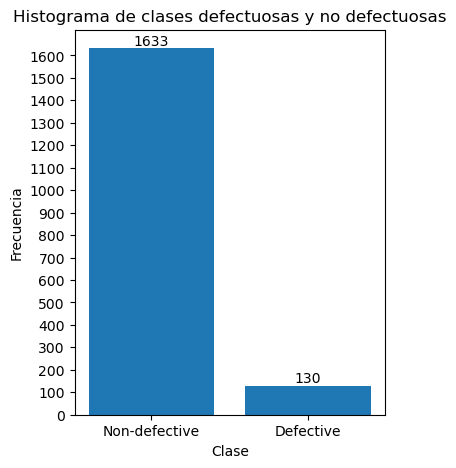

In [6]:
import matplotlib.pyplot as plt
#Defective and Non-defective Class histogram

# Count the occurrences of each class
class_counts = df['RealBug'].value_counts()

# Plot the histogram with increased height
plt.figure(figsize=(4, 5))
bars = plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Histograma de clases defectuosas y no defectuosas')
plt.xticks([0, 1], ['Non-defective', 'Defective'])

# show more numbers in frequency (y axis)
plt.gca().set_yticks(range(0, class_counts.max() + 50, 100))

# Add value labels on top of bars
plt.bar_label(bars, labels=[f'{val}' for val in class_counts.values])

# show the grid
# plt.grid(axis='y')
plt.show()


In [7]:
class_counts

RealBug
False    1633
True      130
Name: count, dtype: int64

<Axes: xlabel='RealBug', ylabel='CountLineCode'>

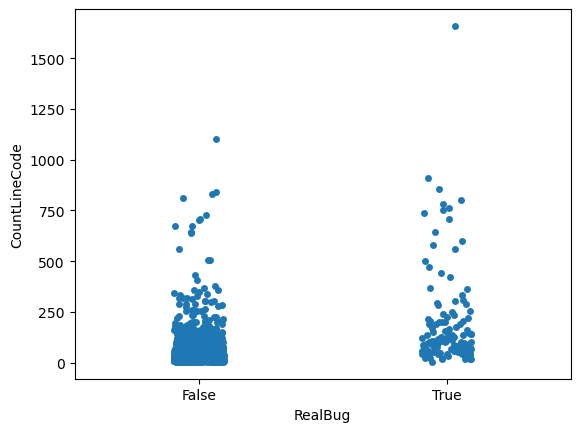

In [8]:
# Dispersion plot of class Defective
import seaborn as sns

sns.stripplot(x='RealBug', y='CountLineCode', data=df, jitter=True)

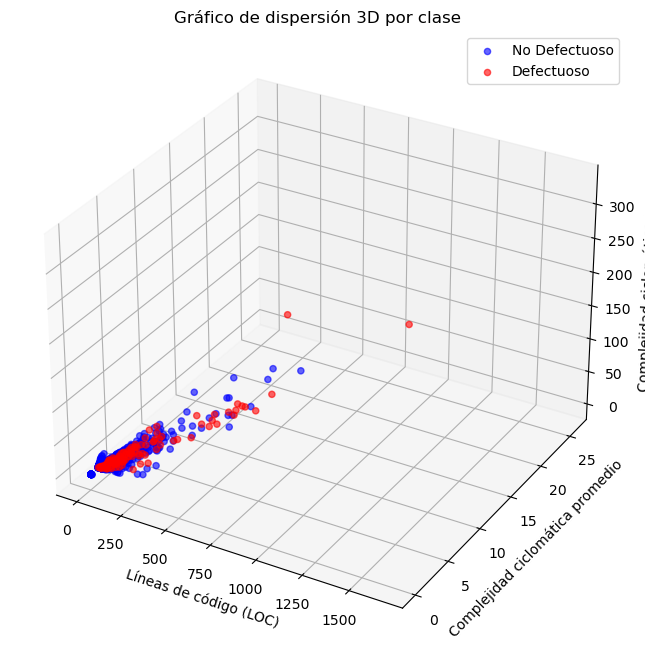

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Separar por clase
defective = df[df['RealBug'] == 1]
non_defective = df[df['RealBug'] == 0]

# Graficar cada clase con diferente color
ax.scatter(non_defective['CountLineCode'], 
           non_defective['AvgCyclomatic'], 
           non_defective['SumCyclomatic'],
           c='blue', label='No Defectuoso', alpha=0.6)

ax.scatter(defective['CountLineCode'], 
           defective['AvgCyclomatic'], 
           defective['SumCyclomatic'],
           c='red', label='Defectuoso', alpha=0.6)

ax.set_xlabel('Líneas de código (LOC)')
ax.set_ylabel('Complejidad ciclomática promedio')
ax.set_zlabel('Complejidad ciclomática total')
ax.set_title('Gráfico de dispersión 3D por clase')
ax.legend()

plt.show()

## Preprocesamiento

- isNull / Missing values
- Duplicados
- Outlaiers ( no porque el metodo HCBOU de balanceo no lo recomienda)
- Particion Train/Test
- Transformación de los datos - Normalización/Estandarización (StandarScaler)
- Balanceo de clases - HCBOU
- Seleccion de caracteristicas (arbol de decision - CABOOST) 
- Reduccion de Dimensionalidad (PCA)

### Missing Values

In [10]:
df.isnull().sum()

File                      0
CountDeclMethodPrivate    0
AvgLineCode               0
CountLine                 0
MaxCyclomatic             0
                         ..
MINOR_COMMIT              0
MINOR_LINE                0
MAJOR_COMMIT              0
MAJOR_LINE                0
RealBug                   0
Length: 67, dtype: int64

### Duplicated

In [11]:
df.duplicated().sum()

0

### Split Train/Test 80/20

In [12]:
# split train and test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RealBug'])
y = df['RealBug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
print(X_train.shape)
print(X_test.shape)

(1410, 66)
(353, 66)


### Normalización

In [14]:
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train.select_dtypes(include=['float64', 'int64'])
scaler = StandardScaler()
X_train_numeric_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_train_numeric.columns)

In [15]:
X_train_numeric.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,...,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000,1410.000000
mean,0.290780,6.931915,134.892908,2.395035,0.432624,1.061702,1.091489,10.219858,1.348936,12.080851,...,3.067376,2.539007,272.524823,12.797872,0.679591,0.492416,0.021986,2.907801,2.517021,1.014894
std,1.338087,6.809768,196.491690,3.030829,1.934356,0.602592,2.605230,21.520516,1.145338,9.022910,...,2.941902,1.139134,428.328373,61.483941,0.198261,0.177787,0.274694,1.175215,1.062320,1.188031
min,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,25.000000,0.000000,0.228070,0.153846,0.000000,1.000000,1.000000,0.000000
25%,0.000000,4.000000,46.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,7.000000,...,2.000000,2.000000,85.250000,0.000000,0.535309,0.333333,0.000000,2.000000,2.000000,0.000000
50%,0.000000,5.000000,79.000000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,10.000000,...,2.000000,2.000000,150.000000,0.000000,0.680632,0.500000,0.000000,3.000000,2.000000,1.000000
75%,0.000000,9.000000,145.750000,3.000000,0.000000,1.000000,1.000000,10.000000,1.000000,14.000000,...,3.000000,3.000000,287.000000,3.000000,0.830429,0.500000,0.000000,4.000000,3.000000,2.000000
max,35.000000,112.000000,3650.000000,33.000000,27.000000,17.000000,54.000000,361.000000,26.000000,133.000000,...,51.000000,10.000000,8133.000000,1022.000000,1.000000,1.000000,5.000000,6.000000,8.000000,8.000000


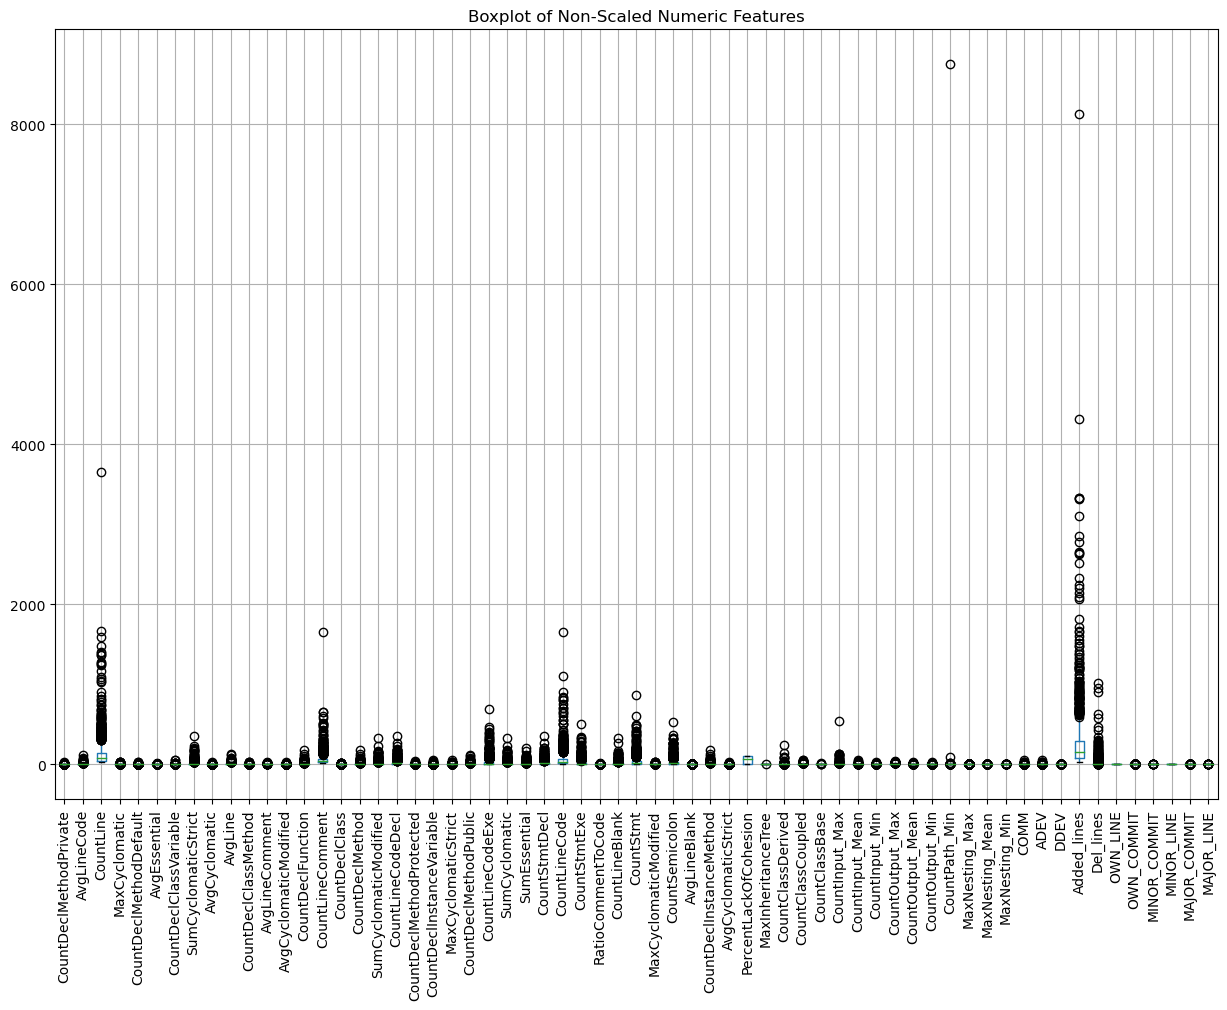

In [16]:
plt.figure(figsize=(15, 10))
X_train_numeric.drop(columns=['CountPath_Max', 'CountPath_Mean']).boxplot()
plt.title('Boxplot of Non-Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()

In [17]:
X_train_numeric_scaled.describe()

,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,AvgLine,...,ADEV,DDEV,Added_lines,Del_lines,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE
count,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,...,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03,1.410000e+03
mean,3.527517e-17,1.259828e-17,2.897603e-17,3.464526e-18,-2.519655e-18,1.146443e-16,-3.275552e-17,-1.385810e-17,-8.062896e-17,5.291276e-17,...,1.322819e-17,1.051956e-16,-4.283414e-17,-1.259828e-18,-3.171616e-16,-2.645638e-17,-2.771621e-17,-1.385810e-17,-6.299138e-18,2.771621e-17
std,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,...,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00,1.000355e+00
min,-2.173875e-01,-1.018298e+00,-5.645646e-01,-7.905050e-01,-2.237322e-01,-1.762517e+00,-4.191095e-01,-4.750576e-01,-1.178181e+00,-1.339384e+00,...,-7.029837e-01,-1.351512e+00,-5.780907e-01,-2.082237e-01,-2.278217e+00,-1.905030e+00,-8.006595e-02,-1.623939e+00,-1.428533e+00,-8.545684e-01
25%,-2.173875e-01,-4.306983e-01,-4.525609e-01,-4.604452e-01,-2.237322e-01,-1.024309e-01,-4.191095e-01,-4.285738e-01,-3.047660e-01,-5.633054e-01,...,-3.629470e-01,-4.733407e-01,-4.373777e-01,-2.082237e-01,-7.279945e-01,-8.951094e-01,-8.006595e-02,-7.727294e-01,-4.868632e-01,-8.545684e-01
50%,-2.173875e-01,-2.837983e-01,-2.845552e-01,-4.604452e-01,-2.237322e-01,-1.024309e-01,-3.513004e-02,-2.891225e-01,-3.047660e-01,-2.307004e-01,...,-3.629470e-01,-4.733407e-01,-2.861550e-01,-2.082237e-01,5.253568e-03,4.267403e-02,-8.006595e-02,7.848033e-02,-4.868632e-01,-1.254084e-02
75%,-2.173875e-01,3.038017e-01,5.527432e-02,1.996745e-01,-2.237322e-01,-1.024309e-01,-3.513004e-02,-1.021984e-02,-3.047660e-01,2.127728e-01,...,-2.291027e-02,4.048308e-01,3.380657e-02,-1.594131e-01,7.610770e-01,4.267403e-02,-8.006595e-02,9.296900e-01,4.548063e-01,8.294867e-01
max,2.594865e+01,1.543450e+01,1.789569e+01,1.010147e+01,1.373936e+01,2.645895e+01,2.031578e+01,1.630558e+01,2.153061e+01,1.340610e+01,...,1.629885e+01,6.552031e+00,1.835803e+01,1.641990e+01,1.616677e+00,2.856024e+00,1.812848e+01,2.632109e+00,5.163154e+00,5.881652e+00


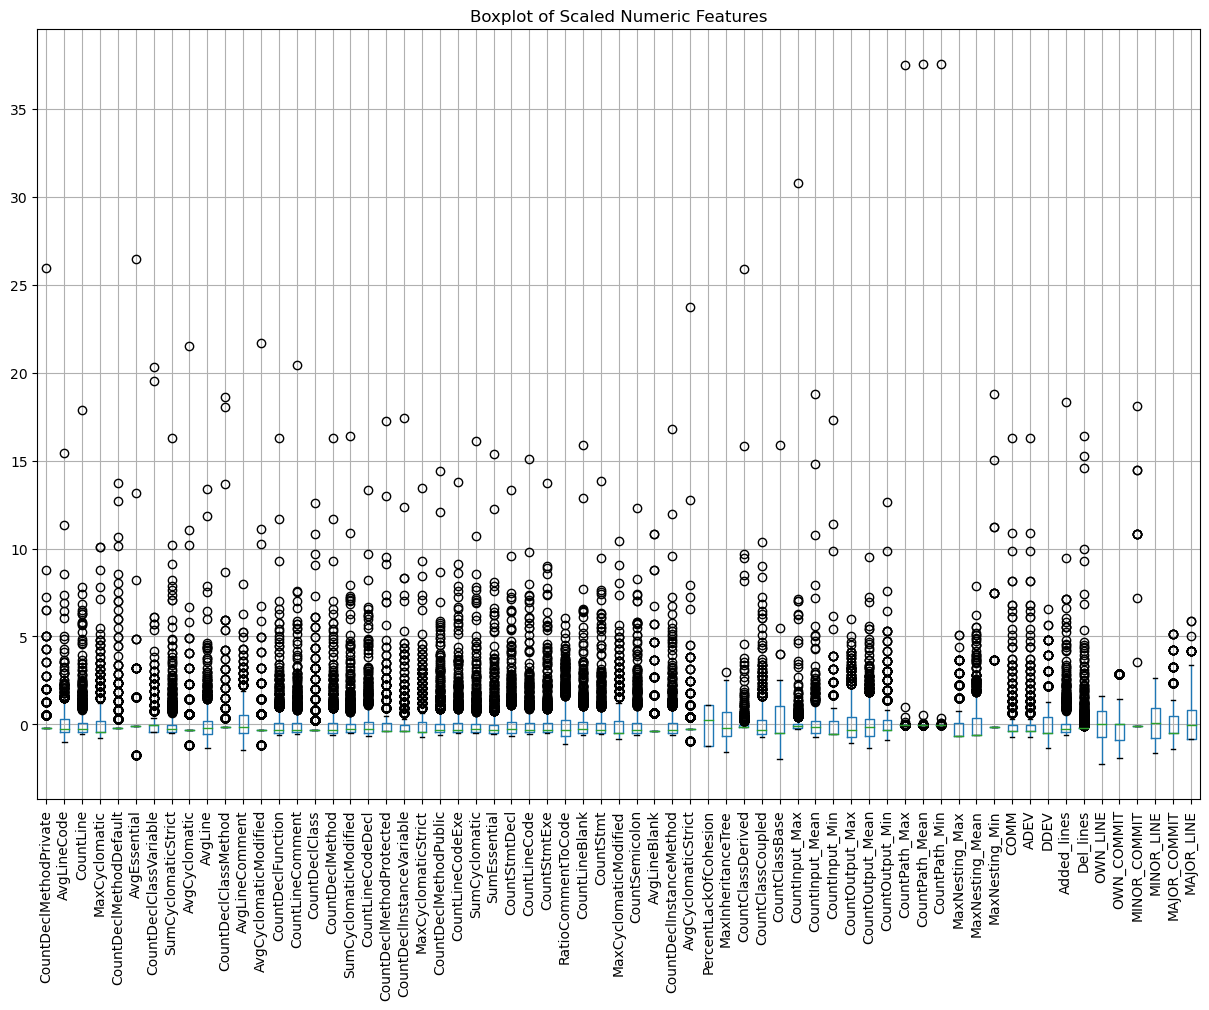

In [18]:
plt.figure(figsize=(15, 10))
X_train_numeric_scaled.boxplot()
plt.title('Boxplot of Scaled Numeric Features')
plt.xticks(rotation=90)
plt.show()